# B2B Invoice Payment Date Prediction Model By @Ashutosh Shukla

In [2432]:
#Importing all necessary modules used in this model building
import math
import pandas as pd
import numpy as np
import seaborn 
import datetime
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split , GridSearchCV,cross_val_score,cross_val_predict,cross_validate,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,max_error,r2_score,median_absolute_error,mean_squared_log_error
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_regression
from sklearn.preprocessing import MinMaxScaler,normalize,StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


In [2433]:
#Loading or reading the csv file from the folder
Data=pd.read_csv(r"C:\Users\ashut\H2HBABBA1197.csv ")

In [2434]:
Data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200726979,BJ'S trust,NaN,2020.0,1.930725e+09,2020-03-31,20200401,20200331,20200415.0,USD,RV,1.0,NaN,24918.62,20200331.0,NAA8,1.930725e+09,1
1,U001,0200759878,SA co,2020-03-05 00:00:00,2020.0,1.930532e+09,2020-02-18,20200215,20200218,20200304.0,USD,RV,1.0,NaN,13301.03,20200218.0,NAH4,1.930532e+09,0
2,U001,0200571849,US in,2019-02-15 00:00:00,2019.0,1.928677e+09,2019-01-26,20190124,20190126,20190210.0,USD,RV,1.0,NaN,56626.56,20190126.0,NAA8,1.928677e+09,0
3,CA02,0140104440,SO in,NaN,2020.0,2.960626e+09,2020-04-03,20200403,20200403,20200419.0,CAD,RV,1.0,NaN,272872.74,20200409.0,CA10,2.960626e+09,1
4,U001,200794332,COST systems,2019-04-22 00:00:00,2019.0,1.929098e+09,2019-04-08,20190406,20190408,20190423.0,USD,RV,1.0,NaN,13305.87,20190408.0,NAAX,1.929098e+09,0


In [2435]:
Data.isnull().sum()# calculating the sum of all null values of each column from dataframe


business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

In [2436]:
Data.shape

(50000, 19)

In [2437]:
# All Description about Data
Data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,5.000000e+04,5.000000e+04,4.999300e+04,50000.000000
mean,2019.305780,2.010714e+09,2.019351e+07,2.019354e+07,2.019369e+07,1.0,NaN,3.212549e+04,2.019354e+07,2.009666e+09,0.200000
std,0.460742,2.878879e+08,4.495930e+03,4.478141e+03,4.472155e+03,0.0,NaN,3.953452e+04,4.478813e+03,2.739274e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018123e+07,1.0,NaN,1.800000e-01,2.018122e+07,1.928502e+09,0.000000
25%,2019.000000,1.929346e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4.741403e+03,2.019051e+07,1.929346e+09,0.000000
50%,2019.000000,1.929969e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,1.735186e+04,2.019091e+07,1.929969e+09,0.000000
75%,2020.000000,1.930620e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,4.705896e+04,2.020013e+07,1.930620e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,1.673456e+06,2.020052e+07,2.960634e+09,1.000000


In [2438]:
Data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [2439]:
#Dataset Columns
Data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [2440]:
#Counting all unique number of values in each column
count_unique  = Data.nunique().to_frame(name = 'Counts')
count_unique

,Counts
business_code,6
cust_number,1445
name_customer,4327
clear_date,397
buisness_year,2
doc_id,48807
posting_date,502
document_create_date,503
document_create_date.1,502
due_in_date,549


# Data Preprcessing

In [2441]:
#Counting Null values from Dataframe
Data.isnull().sum()


business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

In [2442]:
# Since "area_business" has all null value- hence droping that column
Data=Data.drop(columns=['area_business'])
Data.shape

(50000, 18)

In [2443]:
# Creating test dataset of those in "clear_date" has null values
Test_Data = Data[Data['clear_date'].isnull() == True]
Data = Data.dropna()

In [2444]:
Data.shape

(39993, 18)

In [2445]:
Test_Data.shape

(10000, 18)

In [2446]:
#Checking Duplicated Columns from Dataframe
Data_dup = Data.T
Data_dup.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                    False
dtype: bool

In [2447]:
##Checking Duplicated Columns from testdata
Test_Data_dup = Test_Data.T
Test_Data_dup.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                     True
dtype: bool

In [2448]:
#Checking whether "doc_id" and "invoice_id" is same or not
(Data['doc_id'] != Data['invoice_id']).sum()

0

In [2449]:
#Since column 'doc_id' and 'invoice_id' are identical we can drop one
Data = Data.drop(columns=['doc_id'])

In [2450]:
Data.shape

(39993, 17)

In [2451]:
Test_Data = Test_Data.drop(columns=['doc_id'])

In [2452]:
Test_Data.shape

(10000, 17)

In [2453]:
#Remove the column that is unique to each row i.e. "invoice_id"
Data = Data.drop(columns = 'invoice_id')
Test_Data = Test_Data.drop(columns = 'invoice_id')

In [2454]:
Data.shape

(39993, 16)

In [2455]:
Test_Data.shape

(10000, 16)

In [2456]:
Data.cov()

,buisness_year,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,isOpen
buisness_year,0.114761,1.042574e+03,1.054051e+03,1.085393e+03,0.0,-1.409751e+02,1.055572e+03,0.0
document_create_date,1042.573953,1.055975e+07,1.034961e+07,1.001919e+07,0.0,-6.970663e+05,1.034062e+07,0.0
document_create_date.1,1054.051313,1.034961e+07,1.047098e+07,1.011597e+07,0.0,-1.017855e+06,1.046191e+07,0.0
due_in_date,1085.393347,1.001919e+07,1.011597e+07,1.081347e+07,0.0,-1.326018e+06,1.013620e+07,0.0
posting_id,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
total_open_amount,-140.975142,-6.970663e+05,-1.017855e+06,-1.326018e+06,0.0,1.608375e+09,-8.898827e+05,0.0
baseline_create_date,1055.572027,1.034062e+07,1.046191e+07,1.013620e+07,0.0,-8.898827e+05,1.048453e+07,0.0
isOpen,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0


In [2457]:
#Remove some unneccesary columns from dataframe
Data = Data.drop(columns = ['name_customer', 'posting_date','document_create_date'])

In [2458]:
Data.shape

(39993, 13)

In [2459]:
Test_Data = Test_Data.drop(columns =  ['name_customer', 'posting_date','document_create_date'])

In [2460]:
#Filter out constant features to drop that unneccassry columns
Constant_feature = []
Unique_value_count = []
Unique_cols = dict()
for col in list(Data.columns):
    Unique_value_count.append(Data[col].nunique())
    if(Data[col].nunique()==1):
        Constant_feature.append(col)
print('Constant Features are   :',Constant_feature)

Constant Features are   : ['document type', 'posting_id', 'isOpen']


In [2461]:
# Removing the constant feature
Data=Data.drop(columns=Constant_feature)

In [2462]:
Data.shape

(39993, 10)

In [2463]:
# Removing the constant feature
Test_Data=Test_Data.drop(columns=Constant_feature)

In [2464]:
Test_Data.shape

(10000, 10)

In [2465]:
#Checking unique value of each columns(so we can apply encoding)

In [2466]:
Data['business_code'].unique()

array(['U001', 'CA02', 'U013', 'U002', 'U007', 'U005'], dtype=object)

In [2467]:
Data['cust_number'].unique()

array(['0200759878', '0200571849', '200794332', ..., '0200498283',
       '200258814', '200112301'], dtype=object)

In [2468]:
Data['cust_payment_terms'].unique()

array(['NAH4', 'NAA8', 'NAAX', 'NAD5', 'NAGD', 'NAU5', 'CA10', 'NAVF',
       'NAM4', 'NAG2', 'NAC6', 'NAM2', 'NA32', 'NA10', 'NAVE', 'NAX2',
       'NAVM', 'NAM1', 'NAAW', 'NAVQ', 'NAD1', 'NA3B', 'NACB', 'NAVL',
       'NAWU', 'NAUN', 'NAUZ', 'CA30', 'NAWN', 'B052', 'NABG', 'NAWP',
       'C106', 'NAVR', 'NA31', 'NATZ', 'NATK', 'NAB1', 'NA3F', 'CAB1',
       'NA8Q', 'NAD4', 'BR56', 'NA38', 'NAUI', 'CAX2', 'NAV9', 'NAVD',
       'NAD8', 'BR12', 'NAM3', 'NANC', 'NA25', 'NAUP', 'NAVC', 'NAUW',
       'NATX', 'NACE', 'NAUX', 'NATH', 'NATU', 'NATJ', 'NA84', 'NA9X',
       '90M7', 'NATW', 'B112', 'NAV2', 'NABD', 'NATV', 'NAUY'],
      dtype=object)

In [2469]:
Data['buisness_year'].unique()

array([2020., 2019.])

##  LabelEncoding on Categorical data

In [2470]:
# Applying LabelEncoding on Categorical data
customer_details = ['buisness_year','cust_number','business_code','cust_payment_terms']

label_enc_list = dict()
for col in range(len(customer_details)):
    
    label_encoder = LabelEncoder()
    label_encoder.fit(Data[customer_details[col]])
    Data[customer_details[col]] = label_encoder.transform(Data[customer_details[col]])
    label_enc_list[customer_details[col]]=label_encoder

In [2471]:
Data

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1,1,833,2020-03-05 00:00:00,1,20200218,20200304.0,USD,13301.03,20200218.0,35
2,1,647,2019-02-15 00:00:00,0,20190126,20190210.0,USD,56626.56,20190126.0,20
4,1,1315,2019-04-22 00:00:00,0,20190408,20190423.0,USD,13305.87,20190408.0,22
5,1,1248,2019-07-18 00:00:00,0,20190703,20190718.0,USD,44507.78,20190703.0,20
7,1,817,2019-04-26 00:00:00,0,20190411,20190426.0,USD,104178.01,20190411.0,20
...,...,...,...,...,...,...,...,...,...,...
49993,1,856,2019-10-30 00:00:00,0,20191012,20191027.0,USD,419.47,20191012.0,35
49994,0,381,2019-06-20 00:00:00,0,20190610,20190622.0,CAD,36437.31,20190612.0,6
49996,0,410,2019-06-27 00:00:00,0,20190614,20190625.0,CAD,80358.11,20190615.0,6
49997,1,447,2019-03-07 00:00:00,0,20190101,20190302.0,USD,3022.75,20190101.0,27


In [2472]:
#for col in range(len(customer_details)):
    #Test_Data[customer_details[col]] = label_enc_list[customer_details[col]].transform(Test_Data[customer_details[col]])
for col in range(len(customer_details)):
    label_encoder = LabelEncoder()
    label_encoder.fit(Test_Data[customer_details[col]])
    Test_Data[customer_details[col]] = label_encoder.transform(Test_Data[customer_details[col]])   
    label_enc_list[customer_details[col]]=label_encoder

In [2473]:
Test_Data

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,1,351,NaN,0,20200331,20200415.0,USD,24918.62,20200331.0,12
3,0,159,NaN,0,20200403,20200419.0,CAD,272872.74,20200409.0,1
6,1,417,NaN,0,20200510,20200525.0,USD,13707.52,20200510.0,28
8,1,417,NaN,0,20200326,20200410.0,USD,12018.17,20200326.0,28
12,1,438,NaN,0,20200406,20200421.0,USD,3606.64,20200406.0,12
...,...,...,...,...,...,...,...,...,...,...
49986,1,266,NaN,0,20200414,20200429.0,USD,35064.00,20200414.0,12
49991,1,417,NaN,0,20200502,20200517.0,USD,1322.24,20200502.0,28
49992,1,261,NaN,0,20200405,20200420.0,USD,8578.44,20200405.0,12
49995,1,417,NaN,0,20200313,20200328.0,USD,56273.82,20200313.0,28


### Date Conversion 

In [2474]:
# Date-Time Conversion
def str_to_date(time_s,st):
    st=''
    for i in range(len(time_s)+3):
        if(i<4):
            st+=time_s[i]
        if(i==4):
            st+='-'
        if(i==5 or i==6):
            st+= time_s[i-1]
        if(i==7):
            st+='-'
        if(i==8 or i==9):
            st+=time_s[i-2]
    return st


In [2475]:
#Converting date in a format using lamba function
dt_lis = ['baseline_create_date','clear_date','due_in_date','document_create_date.1']
st = ''
Data['baseline_create_date'] = pd.Series(Data['baseline_create_date']).map(lambda x: str_to_date(str(int(x)),st))
Data['due_in_date'] = pd.Series(Data['due_in_date']).map(lambda x: str_to_date(str(int(x)),st))
Data['document_create_date.1'] = pd.Series(Data['document_create_date.1']).map(lambda x: str_to_date(str(int(x)),st))

In [2476]:
st = ''
Test_Data['baseline_create_date'] = pd.Series(Test_Data['baseline_create_date']).map(lambda x: str_to_date(str(int(x)),st))
Test_Data['due_in_date'] = pd.Series(Test_Data['due_in_date']).map(lambda x: str_to_date(str(int(x)),st))
Test_Data['document_create_date.1'] = pd.Series(Test_Data['document_create_date.1']).map(lambda x: str_to_date(str(int(x)),st))

In [2477]:
dt_lis = ['baseline_create_date','clear_date','due_in_date','document_create_date.1']

for col in dt_lis:
    Data[col] = pd.to_datetime(Data[col],format='%Y-%m-%d')
Data.shape

(39993, 10)

In [2478]:
Data

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1,1,833,2020-03-05,1,2020-02-18,2020-03-04,USD,13301.03,2020-02-18,35
2,1,647,2019-02-15,0,2019-01-26,2019-02-10,USD,56626.56,2019-01-26,20
4,1,1315,2019-04-22,0,2019-04-08,2019-04-23,USD,13305.87,2019-04-08,22
5,1,1248,2019-07-18,0,2019-07-03,2019-07-18,USD,44507.78,2019-07-03,20
7,1,817,2019-04-26,0,2019-04-11,2019-04-26,USD,104178.01,2019-04-11,20
...,...,...,...,...,...,...,...,...,...,...
49993,1,856,2019-10-30,0,2019-10-12,2019-10-27,USD,419.47,2019-10-12,35
49994,0,381,2019-06-20,0,2019-06-10,2019-06-22,CAD,36437.31,2019-06-12,6
49996,0,410,2019-06-27,0,2019-06-14,2019-06-25,CAD,80358.11,2019-06-15,6
49997,1,447,2019-03-07,0,2019-01-01,2019-03-02,USD,3022.75,2019-01-01,27


In [2479]:
for col in dt_lis:
    Test_Data[col] = pd.to_datetime(Test_Data[col],format='%Y-%m-%d')
Test_Data.shape

(10000, 10)

In [2480]:
Test_Data

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,1,351,NaT,0,2020-03-31,2020-04-15,USD,24918.62,2020-03-31,12
3,0,159,NaT,0,2020-04-03,2020-04-19,CAD,272872.74,2020-04-09,1
6,1,417,NaT,0,2020-05-10,2020-05-25,USD,13707.52,2020-05-10,28
8,1,417,NaT,0,2020-03-26,2020-04-10,USD,12018.17,2020-03-26,28
12,1,438,NaT,0,2020-04-06,2020-04-21,USD,3606.64,2020-04-06,12
...,...,...,...,...,...,...,...,...,...,...
49986,1,266,NaT,0,2020-04-14,2020-04-29,USD,35064.00,2020-04-14,12
49991,1,417,NaT,0,2020-05-02,2020-05-17,USD,1322.24,2020-05-02,28
49992,1,261,NaT,0,2020-04-05,2020-04-20,USD,8578.44,2020-04-05,12
49995,1,417,NaT,0,2020-03-13,2020-03-28,USD,56273.82,2020-03-13,28


## Filtering Out The Quasi-Constant Features

In [2481]:
#The Quasi-Constant Features
selection = VarianceThreshold(threshold=0.01) # of more that 99% values are same -- we remove the column

cols = list(set(Data.columns) - (set(dt_lis) | set(['invoice_currency'])))

selection.fit(Data[cols])

quasi_ = list(selection.get_support())

for i in range(len(quasi_)):
    if quasi_[i] == False:
        print("The Quasi-Constant Feature in train data is  :",cols[i])
        Data=Data.drop(columns=[cols[i]])

for i in range(len(quasi_)):
    if quasi_[i] == False:
        print("The Quasi-Constant Feature in test data is  :",cols[i])
        Test_Data=Test_Data.drop(columns=[cols[i]])

In [2482]:
temp = pd.Series(Data['document_create_date.1'] - Data['baseline_create_date']).dt.days
temp

1        0
2        0
4        0
5        0
7        0
        ..
49993    0
49994   -2
49996   -1
49997    0
49998   -2
Length: 39993, dtype: int64

In [2483]:
Rows_Drop = temp.value_counts().to_frame(name = 'count')

In [2484]:
# Droping those rows in which ducument_create_date.1 is greater than baseline_create_date
Data = Data[((temp==0) | (temp>0))].reset_index(drop=True)# Droping those rows in which ducument_create_date.1 is greater than baseline_create_date
Data

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,1,833,2020-03-05,1,2020-02-18,2020-03-04,USD,13301.03,2020-02-18,35
1,1,647,2019-02-15,0,2019-01-26,2019-02-10,USD,56626.56,2019-01-26,20
2,1,1315,2019-04-22,0,2019-04-08,2019-04-23,USD,13305.87,2019-04-08,22
3,1,1248,2019-07-18,0,2019-07-03,2019-07-18,USD,44507.78,2019-07-03,20
4,1,817,2019-04-26,0,2019-04-11,2019-04-26,USD,104178.01,2019-04-11,20
...,...,...,...,...,...,...,...,...,...,...
37402,1,607,2019-11-25,0,2019-11-08,2019-11-23,USD,3577.82,2019-11-08,20
37403,1,856,2020-02-19,1,2020-01-28,2020-02-12,USD,2985.93,2020-01-28,35
37404,1,594,2019-10-01,0,2019-09-16,2019-10-01,USD,48906.14,2019-09-16,20
37405,1,856,2019-10-30,0,2019-10-12,2019-10-27,USD,419.47,2019-10-12,35


In [2485]:
Data = Data.drop(columns = ['document_create_date.1'])


In [2486]:
Data.shape

(37407, 9)

In [2487]:
Test_Data = Test_Data.drop(columns = ['document_create_date.1'])

In [2488]:
Test_Data.shape

(10000, 9)

# Feature Engineering/Feature Generation

In [2489]:
#Payment date is excluded  
Date=["due_in_date','baseline_create_date"]

In [2490]:
Data['payment_term']=pd.Series(Data['clear_date'] - Data['baseline_create_date']).dt.days
Data['due_term']=pd.Series(Data['due_in_date'] - Data['baseline_create_date']).dt.days
Data['delay'] = Data['payment_term'] - Data['due_term']
Test_Data['due_term']=pd.Series(Test_Data['due_in_date'] - Test_Data['baseline_create_date']).dt.days

In [2491]:
# On the basis of Delay time grouping into different buckets
def Bucketize(i):
    if i<0:
        return('(< 0) Days')
    if i in range(0,16):
        return('(0-15) Days')
    elif i in range(16,31):
        return('(16-30) Days')
    elif i in range(31,45):
        return('(31-45) Days')
    elif i in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [2492]:
Data = Data.reset_index(drop=True)

Data['DELAY BUCKET(DAYS)']= pd.Series([Bucketize(i=Data['delay'][i])  for i in range(len(Data))])
Data['DUE TERM BUCKET(DAYS)']= pd.Series([Bucketize(i=Data['due_term'][i])  for i in range(len(Data))])


bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}

Data['delay_bucket_id'] = Data['DELAY BUCKET(DAYS)'].map(bucket_mapper)
Data['due_term_bucket_id'] = Data['DUE TERM BUCKET(DAYS)'].map(bucket_mapper)

In [2493]:
Data.shape

(37407, 16)

In [2494]:
Test_Data = Test_Data .reset_index(drop=True)
Test_Data ['DUE TERM BUCKET(DAYS)']= pd.Series([Bucketize(i=Test_Data['due_term'][i])  for i in range(len(Test_Data))])
Test_Data ['due_term_bucket_id'] = Test_Data['DUE TERM BUCKET(DAYS)'].map(bucket_mapper)

In [2495]:
Test_Data.shape

(10000, 12)

## Grouping on the basis of features:'cust_number' and genrating new features

In [2496]:
Test_Data=Test_Data.drop(columns=['clear_date'])

In [2497]:
#Converting date into day, month and year
for col1 in ['baseline_create_date','due_in_date']:
    Data['{}.day'.format(col1)]=Data[col1].dt.day
    Data['{}.year'.format(col1)]=Data[col1].dt.year
    Data['{}.month'.format(col1)]=Data[col1].dt.month
    Test_Data['{}.day'.format(col1)]=Test_Data[col1].dt.day
    Test_Data['{}.year'.format(col1)]=Test_Data[col1].dt.year
    Test_Data['{}.month'.format(col1)]=Test_Data[col1].dt.month
    Test_Data['{}.day_of_week'.format(col1)]=Test_Data[col1].dt.dayofweek

In [2498]:
Data

,business_code,cust_number,clear_date,buisness_year,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,payment_term,...,DELAY BUCKET(DAYS),DUE TERM BUCKET(DAYS),delay_bucket_id,due_term_bucket_id,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month
0,1,833,2020-03-05,1,2020-03-04,USD,13301.03,2020-02-18,35,16,...,(0-15) Days,(0-15) Days,1,1,18,2020,2,4,2020,3
1,1,647,2019-02-15,0,2019-02-10,USD,56626.56,2019-01-26,20,20,...,(0-15) Days,(0-15) Days,1,1,26,2019,1,10,2019,2
2,1,1315,2019-04-22,0,2019-04-23,USD,13305.87,2019-04-08,22,14,...,(< 0) Days,(0-15) Days,0,1,8,2019,4,23,2019,4
3,1,1248,2019-07-18,0,2019-07-18,USD,44507.78,2019-07-03,20,15,...,(0-15) Days,(0-15) Days,1,1,3,2019,7,18,2019,7
4,1,817,2019-04-26,0,2019-04-26,USD,104178.01,2019-04-11,20,15,...,(0-15) Days,(0-15) Days,1,1,11,2019,4,26,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37402,1,607,2019-11-25,0,2019-11-23,USD,3577.82,2019-11-08,20,17,...,(0-15) Days,(0-15) Days,1,1,8,2019,11,23,2019,11
37403,1,856,2020-02-19,1,2020-02-12,USD,2985.93,2020-01-28,35,22,...,(0-15) Days,(0-15) Days,1,1,28,2020,1,12,2020,2
37404,1,594,2019-10-01,0,2019-10-01,USD,48906.14,2019-09-16,20,15,...,(0-15) Days,(0-15) Days,1,1,16,2019,9,1,2019,10
37405,1,856,2019-10-30,0,2019-10-27,USD,419.47,2019-10-12,35,18,...,(0-15) Days,(0-15) Days,1,1,12,2019,10,27,2019,10


In [2499]:
Test_Data

,business_code,cust_number,buisness_year,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,due_term,DUE TERM BUCKET(DAYS),due_term_bucket_id,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,baseline_create_date.day_of_week,due_in_date.day,due_in_date.year,due_in_date.month,due_in_date.day_of_week
0,1,351,0,2020-04-15,USD,24918.62,2020-03-31,12,15,(0-15) Days,1,31,2020,3,1,15,2020,4,2
1,0,159,0,2020-04-19,CAD,272872.74,2020-04-09,1,10,(0-15) Days,1,9,2020,4,3,19,2020,4,6
2,1,417,0,2020-05-25,USD,13707.52,2020-05-10,28,15,(0-15) Days,1,10,2020,5,6,25,2020,5,0
3,1,417,0,2020-04-10,USD,12018.17,2020-03-26,28,15,(0-15) Days,1,26,2020,3,3,10,2020,4,4
4,1,438,0,2020-04-21,USD,3606.64,2020-04-06,12,15,(0-15) Days,1,6,2020,4,0,21,2020,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,266,0,2020-04-29,USD,35064.00,2020-04-14,12,15,(0-15) Days,1,14,2020,4,1,29,2020,4,2
9996,1,417,0,2020-05-17,USD,1322.24,2020-05-02,28,15,(0-15) Days,1,2,2020,5,5,17,2020,5,6
9997,1,261,0,2020-04-20,USD,8578.44,2020-04-05,12,15,(0-15) Days,1,5,2020,4,6,20,2020,4,0
9998,1,417,0,2020-03-28,USD,56273.82,2020-03-13,28,15,(0-15) Days,1,13,2020,3,4,28,2020,3,5


In [2500]:
df1 = Data.groupby('cust_number').sum()
df = df1.rename(columns = {'total_open_amount':'Sum_base_amount'})['Sum_base_amount']
df2 = df1.rename(columns = {'due_term':'Sum_due_term'})['Sum_due_term']

Data = pd.merge(Data,df,on = 'cust_number' )
Data = pd.merge(Data,df2,on = 'cust_number' )

df = Data.groupby('cust_number').mean()
df = df.rename(columns = {'total_open_amount':'mean_base_amount','due_term':'mean_due_term'})
Data = pd.merge(Data,df['mean_base_amount'],on = 'cust_number' )
Data = pd.merge(Data,df['mean_due_term'],on = 'cust_number' )

Data['amount/mean_amount'] = Data['total_open_amount']/Data['mean_base_amount']
Data['amount-/mean_amount'] = (Data['total_open_amount']-Data['mean_base_amount'])/Data['mean_base_amount']
Data['due_term/amount'] = Data['due_term']/Data['total_open_amount']
Data['mean_due_term/amount'] = Data['mean_due_term']/Data['total_open_amount']
Data['mean_due_term/Sum_base_amount'] = Data['mean_due_term']/Data['Sum_base_amount']

In [2501]:
Data

,business_code,cust_number,clear_date,buisness_year,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,payment_term,...,due_in_date.month,Sum_base_amount,Sum_due_term,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount
0,1,833,2020-03-05,1,2020-03-04,USD,13301.03,2020-02-18,35,16,...,3,35815397.22,19670,34907.794561,19.17154,0.381033,-0.618967,0.001128,0.001441,5.352877e-07
1,1,833,2019-08-27,0,2019-08-26,USD,41900.53,2019-08-11,35,16,...,8,35815397.22,19670,34907.794561,19.17154,1.200320,0.200320,0.000358,0.000458,5.352877e-07
2,1,833,2019-08-02,0,2019-07-31,USD,17184.77,2019-07-16,35,17,...,7,35815397.22,19670,34907.794561,19.17154,0.492290,-0.507710,0.000873,0.001116,5.352877e-07
3,1,833,2019-12-16,0,2019-12-14,USD,46909.98,2019-11-29,35,17,...,12,35815397.22,19670,34907.794561,19.17154,1.343825,0.343825,0.000320,0.000409,5.352877e-07
4,1,833,2019-03-04,0,2019-03-02,USD,29661.78,2019-02-15,35,17,...,3,35815397.22,19670,34907.794561,19.17154,0.849718,-0.150282,0.000506,0.000646,5.352877e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37402,5,346,2019-04-09,0,2019-05-09,USD,3298.16,2019-04-09,61,0,...,5,3298.16,30,3298.160000,30.00000,1.000000,0.000000,0.009096,0.009096,9.095981e-03
37403,3,44,2019-06-03,0,2019-06-22,USD,120.00,2019-05-23,31,11,...,6,120.00,30,120.000000,30.00000,1.000000,0.000000,0.250000,0.250000,2.500000e-01
37404,1,620,2019-12-24,0,2019-12-22,USD,29351.54,2019-12-07,20,17,...,12,29351.54,15,29351.540000,15.00000,1.000000,0.000000,0.000511,0.000511,5.110464e-04
37405,1,1134,2019-04-25,0,2019-04-26,USD,15885.60,2019-04-11,20,14,...,4,15885.60,15,15885.600000,15.00000,1.000000,0.000000,0.000944,0.000944,9.442514e-04


In [2502]:
df1 = Test_Data.groupby('cust_number').sum()
df = df1.rename(columns = {'total_open_amount':'Sum_base_amount'})['Sum_base_amount']
df2 = df1.rename(columns = {'due_term':'Sum_due_term'})['Sum_due_term']
Test_Data = pd.merge(Test_Data,df,on = 'cust_number' )
Test_Data = pd.merge(Test_Data,df2,on = 'cust_number' )

df = Test_Data.groupby('cust_number').mean()
df = df.rename(columns = {'total_open_amount':'mean_base_amount','due_term':'mean_due_term'})
Test_Data= pd.merge(Test_Data,df['mean_base_amount'],on = 'cust_number' )
Test_Data = pd.merge(Test_Data,df['mean_due_term'],on = 'cust_number' )

Test_Data['amount/mean_amount'] = Test_Data['total_open_amount']/Test_Data['mean_base_amount']
Test_Data['amount-/mean_amount'] = (Test_Data['total_open_amount']- Test_Data['mean_base_amount'])/Test_Data['mean_base_amount']
Test_Data['due_term/amount'] = Test_Data['due_term']/Test_Data['total_open_amount']
Test_Data['mean_due_term/amount'] = Test_Data['mean_due_term']/Test_Data['total_open_amount']
Test_Data['mean_due_term/Sum_base_amount'] = Test_Data['mean_due_term']/Test_Data['Sum_base_amount']

In [2503]:
Test_Data

,business_code,cust_number,buisness_year,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,due_term,DUE TERM BUCKET(DAYS),...,due_in_date.day_of_week,Sum_base_amount,Sum_due_term,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount
0,1,351,0,2020-04-15,USD,24918.62,2020-03-31,12,15,(0-15) Days,...,2,1944278.09,6185,4753.736161,15.122249,5.241902,4.241902,0.000602,0.000607,0.000008
1,1,351,0,2020-03-13,USD,435.00,2020-02-27,12,15,(0-15) Days,...,4,1944278.09,6185,4753.736161,15.122249,0.091507,-0.908493,0.034483,0.034764,0.000008
2,1,351,0,2020-05-12,USD,321.54,2020-04-27,12,15,(0-15) Days,...,1,1944278.09,6185,4753.736161,15.122249,0.067639,-0.932361,0.046650,0.047031,0.000008
3,1,351,0,2020-04-20,USD,71.46,2020-04-05,12,15,(0-15) Days,...,0,1944278.09,6185,4753.736161,15.122249,0.015032,-0.984968,0.209908,0.211618,0.000008
4,1,351,0,2020-05-05,USD,126.24,2020-04-20,12,15,(0-15) Days,...,1,1944278.09,6185,4753.736161,15.122249,0.026556,-0.973444,0.118821,0.119790,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,603,0,2020-04-02,USD,49217.93,2020-03-18,12,15,(0-15) Days,...,3,49217.93,15,49217.930000,15.000000,1.000000,0.000000,0.000305,0.000305,0.000305
9996,1,255,0,2020-04-30,USD,20700.42,2020-04-15,12,15,(0-15) Days,...,3,20700.42,15,20700.420000,15.000000,1.000000,0.000000,0.000725,0.000725,0.000725
9997,1,560,0,2020-04-08,USD,8758.80,2020-03-24,12,15,(0-15) Days,...,2,8758.80,15,8758.800000,15.000000,1.000000,0.000000,0.001713,0.001713,0.001713
9998,0,43,0,2020-04-28,CAD,13810.80,2020-04-18,1,10,(0-15) Days,...,1,13810.80,10,13810.800000,10.000000,1.000000,0.000000,0.000724,0.000724,0.000724


In [2504]:
df = dict(zip(list(Data['cust_number'].value_counts().index),list(Data['cust_number'].value_counts())))

Data['cust_count'] = Data['cust_number'].map(df)
Data['cust_count/mean_amount'] = Data['cust_count']/Data['mean_base_amount']

Test_Data['cust_count'] = Test_Data['cust_number'].map(df)
Test_Data['cust_count/mean_amount'] = Test_Data['cust_number']/Test_Data['mean_base_amount']

## SORTING THE DATAFRAME ACCORDINF TO THE "baseline_create_date"

In [2505]:
Data = Data.sort_values(['baseline_create_date']).reset_index(drop=True)
Data['cust_count*due_term/amount'] =(Data['cust_count']*Data['due_term'])/Data['total_open_amount']

In [2506]:
Data

,business_code,cust_number,clear_date,buisness_year,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,payment_term,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
0,1,820,2019-02-04,0,2018-12-31,USD,134.64,2018-12-16,38,50,...,22428.750000,15.000000,0.006003,-0.993997,0.111408,0.111408,4.777032e-05,14,0.000624,1.559715
1,0,382,2019-02-20,0,2019-01-06,CAD,22661.76,2018-12-27,6,55,...,33635.631786,10.000000,0.673743,-0.326257,0.000441,0.000441,1.061799e-05,28,0.000832,0.012356
2,1,856,2019-01-10,0,2019-01-14,USD,27788.16,2018-12-30,35,11,...,22149.664473,15.021511,1.254563,0.254563,0.000540,0.000541,7.481328e-08,9065,0.409261,4.893271
3,1,856,2019-01-09,0,2019-01-14,USD,12583.40,2018-12-30,35,10,...,22149.664473,15.021511,0.568108,-0.431892,0.001192,0.001194,7.481328e-08,9065,0.409261,10.805903
4,1,856,2019-01-09,0,2019-01-14,USD,2710.55,2018-12-30,35,10,...,22149.664473,15.021511,0.122374,-0.877626,0.005534,0.005542,7.481328e-08,9065,0.409261,50.165096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37402,1,477,2020-03-12,1,2020-03-12,USD,712.54,2020-02-26,20,15,...,5682.368000,15.714286,0.125395,-0.874605,0.021051,0.022054,3.950638e-05,70,0.012319,1.473601
37403,1,1365,2020-03-27,1,2020-04-01,USD,14125.59,2020-02-26,33,30,...,23651.672679,35.000000,0.597234,-0.402766,0.002478,0.002478,3.303149e-06,448,0.018942,1.110042
37404,1,591,2020-03-20,1,2020-03-13,USD,28311.65,2020-02-27,20,22,...,21818.677500,33.750000,1.297588,0.297588,0.000530,0.001192,3.867100e-04,4,0.000183,0.002119
37405,1,833,2020-03-13,1,2020-03-13,USD,75478.93,2020-02-27,35,15,...,34907.794561,19.171540,2.162237,1.162237,0.000199,0.000254,5.352877e-07,1026,0.029392,0.203898


In [2507]:
Test_Data = Test_Data.sort_values(['baseline_create_date']).reset_index(drop=True)
Test_Data['cust_count*due_term/amount'] =(Test_Data['cust_count']*Test_Data['due_term'])/Test_Data['total_open_amount']

In [2508]:
Test_Data

,business_code,cust_number,buisness_year,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,due_term,DUE TERM BUCKET(DAYS),...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
0,1,393,0,2020-01-31,USD,78.49,2020-01-16,31,15,(0-15) Days,...,18027.218333,15.000000,0.004354,-0.995646,0.191107,0.191107,1.386792e-04,NaN,0.021800,NaN
1,1,417,0,2020-03-13,USD,14012.88,2020-02-27,28,15,(0-15) Days,...,21754.810485,15.118343,0.644128,-0.355872,0.001070,0.001079,2.741391e-07,NaN,0.019168,NaN
2,1,417,0,2020-03-13,USD,55684.17,2020-02-27,28,15,(0-15) Days,...,21754.810485,15.118343,2.559626,1.559626,0.000269,0.000272,2.741391e-07,NaN,0.019168,NaN
3,1,351,0,2020-03-13,USD,519.34,2020-02-27,12,15,(0-15) Days,...,4753.736161,15.122249,0.109249,-0.890751,0.028883,0.029118,7.777822e-06,4.0,0.073837,0.115531
4,1,240,0,2020-03-28,USD,58926.00,2020-02-27,24,30,(16-30) Days,...,58926.000000,30.000000,1.000000,0.000000,0.000509,0.000509,5.091131e-04,2.0,0.004073,0.001018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,146,0,2020-05-26,CAD,135262.38,2020-05-16,1,10,(0-15) Days,...,106756.644375,10.000000,1.267016,0.267016,0.000074,0.000074,5.854437e-06,1.0,0.001368,0.000074
9996,0,146,0,2020-05-26,CAD,135262.38,2020-05-16,1,10,(0-15) Days,...,106756.644375,10.000000,1.267016,0.267016,0.000074,0.000074,5.854437e-06,1.0,0.001368,0.000074
9997,1,401,0,2020-06-01,USD,22835.50,2020-05-17,28,15,(0-15) Days,...,35542.344286,17.142857,0.642487,-0.357513,0.000657,0.000751,1.722579e-06,NaN,0.011282,NaN
9998,0,152,0,2020-05-29,CAD,14219.64,2020-05-19,1,10,(0-15) Days,...,14219.640000,10.000000,1.000000,0.000000,0.000703,0.000703,7.032527e-04,5.0,0.010689,0.003516


In [2509]:
#MANIPULATING THE 'AMOUNT COLUMN - CONVERTING TO USD
x = Data[Data['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.79)    

for i in x.index:
    Data['total_open_amount'][i] = 0.79*x[i]


Data = Data.drop(columns=['invoice_currency'])

x = Test_Data[Test_Data['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.79)    

for i in x.index:
    Test_Data['total_open_amount'][i] = 0.79*x[i]
Test_Data = Test_Data.drop(columns=['invoice_currency']) 

In [2510]:
Test_Data= Test_Data.sort_values(['baseline_create_date']).reset_index(drop=True)
Test_Data

,business_code,cust_number,buisness_year,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,due_term,DUE TERM BUCKET(DAYS),due_term_bucket_id,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
0,1,393,0,2020-01-31,78.490000,2020-01-16,31,15,(0-15) Days,1,...,18027.218333,15.000000,0.004354,-0.995646,0.191107,0.191107,1.386792e-04,NaN,0.021800,NaN
1,1,320,0,2020-03-30,1864.060000,2020-02-27,7,32,(31-45) Days,4,...,19215.198017,24.155172,0.097010,-0.902990,0.017167,0.012958,1.083696e-05,2.0,0.016653,0.034334
2,1,417,0,2020-03-13,25547.340000,2020-02-27,28,15,(0-15) Days,1,...,21754.810485,15.118343,1.174331,0.174331,0.000587,0.000592,2.741391e-07,NaN,0.019168,NaN
3,1,465,0,2020-03-13,23798.760000,2020-02-27,12,15,(0-15) Days,1,...,34471.038788,15.000000,0.690399,-0.309601,0.000630,0.000630,1.318630e-05,1.0,0.013490,0.000630
4,1,682,0,2020-04-02,10248.000000,2020-02-27,26,35,(31-45) Days,4,...,26482.815882,35.000000,0.386968,-0.613032,0.003415,0.003415,7.774187e-05,4.0,0.025753,0.013661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,146,0,2020-05-26,84417.251358,2020-05-16,1,10,(0-15) Days,1,...,106756.644375,10.000000,1.267016,0.267016,0.000074,0.000074,5.854437e-06,1.0,0.001368,0.000074
9996,0,146,0,2020-05-26,84417.251358,2020-05-16,1,10,(0-15) Days,1,...,106756.644375,10.000000,1.267016,0.267016,0.000074,0.000074,5.854437e-06,1.0,0.001368,0.000074
9997,1,401,0,2020-06-01,22835.500000,2020-05-17,28,15,(0-15) Days,1,...,35542.344286,17.142857,0.642487,-0.357513,0.000657,0.000751,1.722579e-06,NaN,0.011282,NaN
9998,0,152,0,2020-05-29,8874.477324,2020-05-19,1,10,(0-15) Days,1,...,14219.640000,10.000000,1.000000,0.000000,0.000703,0.000703,7.032527e-04,5.0,0.010689,0.003516


In [2511]:
cols_drop1 = set(Data.columns) - set(Test_Data.columns)
cols_drop1

{'DELAY BUCKET(DAYS)',
 'clear_date',
 'delay',
 'delay_bucket_id',
 'payment_term'}

In [2512]:
Data.corr()['payment_term']

business_code                    0.247247
cust_number                      0.077825
buisness_year                   -0.013930
total_open_amount               -0.060554
cust_payment_terms               0.301739
payment_term                     1.000000
due_term                         0.629313
delay                            0.618167
delay_bucket_id                  0.600129
due_term_bucket_id               0.650252
baseline_create_date.day         0.009785
baseline_create_date.year       -0.014264
baseline_create_date.month      -0.056893
due_in_date.day                 -0.016339
due_in_date.year                -0.020113
due_in_date.month                0.016163
Sum_base_amount                 -0.237629
Sum_due_term                    -0.239051
mean_base_amount                 0.035736
mean_due_term                    0.437044
amount/mean_amount              -0.062683
amount-/mean_amount             -0.062683
due_term/amount                  0.057278
mean_due_term/amount             0

### LOG TRANSFORMATION OF "total_open_amount"

In [2513]:
# Applying log transformation
Data['total_open_amount'] = np.log(Data['total_open_amount'])#
Data

,business_code,cust_number,clear_date,buisness_year,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,payment_term,due_term,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
0,1,820,2019-02-04,0,2018-12-31,4.902605,2018-12-16,38,50,15,...,22428.750000,15.000000,0.006003,-0.993997,0.111408,0.111408,4.777032e-05,14,0.000624,1.559715
1,0,382,2019-02-20,0,2019-01-06,9.556990,2018-12-27,6,55,10,...,33635.631786,10.000000,0.673743,-0.326257,0.000441,0.000441,1.061799e-05,28,0.000832,0.012356
2,1,856,2019-01-10,0,2019-01-14,10.232365,2018-12-30,35,11,15,...,22149.664473,15.021511,1.254563,0.254563,0.000540,0.000541,7.481328e-08,9065,0.409261,4.893271
3,1,856,2019-01-09,0,2019-01-14,9.440134,2018-12-30,35,10,15,...,22149.664473,15.021511,0.568108,-0.431892,0.001192,0.001194,7.481328e-08,9065,0.409261,10.805903
4,1,856,2019-01-09,0,2019-01-14,7.904907,2018-12-30,35,10,15,...,22149.664473,15.021511,0.122374,-0.877626,0.005534,0.005542,7.481328e-08,9065,0.409261,50.165096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37402,1,477,2020-03-12,1,2020-03-12,6.568836,2020-02-26,20,15,15,...,5682.368000,15.714286,0.125395,-0.874605,0.021051,0.022054,3.950638e-05,70,0.012319,1.473601
37403,1,1365,2020-03-27,1,2020-04-01,9.555743,2020-02-26,33,30,35,...,23651.672679,35.000000,0.597234,-0.402766,0.002478,0.002478,3.303149e-06,448,0.018942,1.110042
37404,1,591,2020-03-20,1,2020-03-13,10.251029,2020-02-27,20,22,15,...,21818.677500,33.750000,1.297588,0.297588,0.000530,0.001192,3.867100e-04,4,0.000183,0.002119
37405,1,833,2020-03-13,1,2020-03-13,11.231609,2020-02-27,35,15,15,...,34907.794561,19.171540,2.162237,1.162237,0.000199,0.000254,5.352877e-07,1026,0.029392,0.203898


In [2514]:
Test_Data['total_open_amount'] = np.log(Test_Data['total_open_amount'])
Test_Data

,business_code,cust_number,buisness_year,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,due_term,DUE TERM BUCKET(DAYS),due_term_bucket_id,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
0,1,393,0,2020-01-31,4.362971,2020-01-16,31,15,(0-15) Days,1,...,18027.218333,15.000000,0.004354,-0.995646,0.191107,0.191107,1.386792e-04,NaN,0.021800,NaN
1,1,320,0,2020-03-30,7.530512,2020-02-27,7,32,(31-45) Days,4,...,19215.198017,24.155172,0.097010,-0.902990,0.017167,0.012958,1.083696e-05,2.0,0.016653,0.034334
2,1,417,0,2020-03-13,10.148288,2020-02-27,28,15,(0-15) Days,1,...,21754.810485,15.118343,1.174331,0.174331,0.000587,0.000592,2.741391e-07,NaN,0.019168,NaN
3,1,465,0,2020-03-13,10.077389,2020-02-27,12,15,(0-15) Days,1,...,34471.038788,15.000000,0.690399,-0.309601,0.000630,0.000630,1.318630e-05,1.0,0.013490,0.000630
4,1,682,0,2020-04-02,9.234838,2020-02-27,26,35,(31-45) Days,4,...,26482.815882,35.000000,0.386968,-0.613032,0.003415,0.003415,7.774187e-05,4.0,0.025753,0.013661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,146,0,2020-05-26,11.343527,2020-05-16,1,10,(0-15) Days,1,...,106756.644375,10.000000,1.267016,0.267016,0.000074,0.000074,5.854437e-06,1.0,0.001368,0.000074
9996,0,146,0,2020-05-26,11.343527,2020-05-16,1,10,(0-15) Days,1,...,106756.644375,10.000000,1.267016,0.267016,0.000074,0.000074,5.854437e-06,1.0,0.001368,0.000074
9997,1,401,0,2020-06-01,10.036072,2020-05-17,28,15,(0-15) Days,1,...,35542.344286,17.142857,0.642487,-0.357513,0.000657,0.000751,1.722579e-06,NaN,0.011282,NaN
9998,0,152,0,2020-05-29,9.090935,2020-05-19,1,10,(0-15) Days,1,...,14219.640000,10.000000,1.000000,0.000000,0.000703,0.000703,7.032527e-04,5.0,0.010689,0.003516


In [2515]:
# Looking For the values of categorical features which are diffrent from train data
list_cust_details = ['cust_number','business_code','cust_payment_terms']

for col in list_cust_details:
    coun = 0
    for i in range(len(Test_Data)):
        if Test_Data[col][i] in set(Test_Data[col])-set(Data[col]):
            coun+=1
    print("\n\n\nColumn Name:    ",col,"\nTotal Unique Values in train-set:     ",Data[col].nunique(),"\nNew Valuess introduced in Test:     ",len(set(Test_Data[col].unique()) - set(Data[col].unique())),"\nValues are:",set(Test_Data[col])-set(Data[col]),"\nCount :",coun)




Column Name:     cust_number 
Total Unique Values in train-set:      1244 
New Valuess introduced in Test:      100 
Values are: {37, 62, 65, 69, 70, 77, 596, 87, 90, 98, 99, 100, 109, 111, 116, 121, 127, 130, 132, 136, 137, 138, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 169, 254, 271, 293, 300, 306, 366, 369, 371, 372, 373, 374, 375, 376, 377, 379, 383, 385, 386, 387, 388, 389, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 406, 407, 409, 411, 412, 413, 414, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 429, 430, 431, 432, 433, 434, 435, 437, 438, 439, 442, 444, 446} 
Count : 4070



Column Name:     business_code 
Total Unique Values in train-set:      6 
New Valuess introduced in Test:      0 
Values are: set() 
Count : 0



Column Name:     cust_payment_terms 
Total Unique Values in train-set:      61 
New Valuess introduced in Test:      4 
Values are: {40, 41, 42, 28} 
Count : 3080


### CORRELATION MATRIX

In [2516]:
corr=Data.corr()
corr

,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,payment_term,due_term,delay,delay_bucket_id,due_term_bucket_id,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
business_code,1.000000e+00,-6.448789e-02,0.006326,-0.011855,0.380367,0.247247,0.247555,0.059828,0.058006,0.248985,...,-8.345171e-02,3.980861e-01,5.004406e-17,5.986008e-17,0.001185,0.002704,4.037720e-02,-6.162339e-02,-6.473455e-02,-0.010397
cust_number,-6.448789e-02,1.000000e+00,-0.035540,0.034910,0.231424,0.077825,-0.063217,0.161587,0.134983,0.002137,...,-3.227844e-02,-1.016582e-01,-1.229063e-16,-1.379586e-16,-0.005809,-0.006608,-4.105796e-02,1.178140e-01,9.143491e-02,0.007695
buisness_year,6.325939e-03,-3.554015e-02,1.000000,-0.002310,-0.005842,-0.013930,-0.000865,-0.016603,-0.005111,0.001383,...,-1.294574e-02,1.378648e-03,-6.948315e-04,-6.948315e-04,0.014968,0.015538,-5.974979e-03,1.560171e-02,2.438183e-02,-0.000777
total_open_amount,-1.185479e-02,3.491009e-02,-0.002310,1.000000,-0.129773,-0.066010,-0.089335,0.007536,-0.009073,-0.086813,...,4.442798e-01,7.205748e-02,5.536347e-01,5.536347e-01,-0.083366,-0.102937,-5.025069e-02,-7.080746e-02,-2.146140e-01,-0.282305
cust_payment_terms,3.803671e-01,2.314238e-01,-0.005842,-0.129773,1.000000,0.301739,0.275253,0.100183,0.074364,0.288592,...,-2.083509e-01,9.476192e-02,-2.823413e-02,-2.823413e-02,0.013569,0.012147,2.687036e-03,3.382036e-01,2.869477e-01,0.054898
payment_term,2.472471e-01,7.782518e-02,-0.013930,-0.066010,0.301739,1.000000,0.629313,0.618167,0.600129,0.650252,...,3.573638e-02,4.370437e-01,-6.268339e-02,-6.268339e-02,0.057278,0.057001,1.270985e-02,-2.391306e-01,-2.435673e-01,0.022760
due_term,2.475549e-01,-6.321743e-02,-0.000865,-0.089335,0.275253,0.629313,1.000000,-0.221857,-0.079499,0.932467,...,4.592250e-02,6.218629e-01,-8.587981e-02,-8.587981e-02,0.026387,0.017586,2.727068e-02,-1.524791e-01,-1.659183e-01,0.006544
delay,5.982846e-02,1.615869e-01,-0.016603,0.007536,0.100183,0.618167,-0.221857,1.000000,0.833381,-0.127280,...,-1.610280e-03,-8.062905e-02,8.214965e-03,8.214965e-03,0.045177,0.053731,-1.163597e-02,-1.458088e-01,-1.377824e-01,0.021937
delay_bucket_id,5.800617e-02,1.349833e-01,-0.005111,-0.009073,0.074364,0.600129,-0.079499,0.833381,1.000000,0.011591,...,7.781975e-02,-3.700548e-02,-1.112437e-02,-1.112437e-02,0.042105,0.046602,-2.851372e-03,-3.388464e-01,-3.044987e-01,0.003474
due_term_bucket_id,2.489847e-01,2.136943e-03,0.001383,-0.086813,0.288592,0.650252,0.932467,-0.127280,0.011591,1.000000,...,-1.077409e-03,5.772541e-01,-7.199238e-02,-7.199238e-02,0.019890,0.012515,2.238798e-02,-2.052693e-01,-2.177091e-01,-0.007833


### COVARIENCE MATRIX

In [2517]:
Data.cov()

,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,payment_term,due_term,delay,delay_bucket_id,due_term_bucket_id,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
business_code,2.499066e-01,-7.633458e+00,0.001072,-1.067162e-02,2.204301e+00,1.656373e+00,1.336925e+00,3.194484e-01,2.312400e-02,1.352710e-01,...,-8.911485e+02,1.336925e+00,4.615887e-17,4.653878e-17,0.000528,0.000728,9.155752e-05,-1.151936e+02,-5.684840e-03,-1.439265e+00
cust_number,-7.633458e+00,5.606716e+04,-2.853761,1.488513e+01,6.352454e+02,2.469520e+02,-1.617103e+02,4.086623e+02,2.548791e+01,5.499087e-01,...,-1.632649e+05,-1.617103e+02,-3.831908e-14,-3.870811e-14,-1.225130,-0.842946,-4.409818e-02,1.043146e+05,3.803291e+00,5.045524e+02
buisness_year,1.072402e-03,-2.853761e+00,0.114997,-1.410362e-03,-2.296414e-02,-6.330380e-02,-3.168562e-03,-6.013524e-02,-1.382191e-03,5.096830e-04,...,-9.377711e+01,3.140786e-03,-2.864690e-04,-2.864690e-04,0.004521,0.002838,-9.190716e-06,1.978382e+01,1.452458e-03,-7.299027e-02
total_open_amount,-1.067162e-02,1.488513e+01,-0.001410,3.242611e+00,-2.709015e+00,-1.592918e+00,-1.737864e+00,1.449465e-01,-1.302823e-02,-1.698923e-01,...,1.708953e+04,8.717014e-01,1.212062e+00,1.212062e+00,-0.133704,-0.099857,-4.104483e-04,-4.767828e+02,-6.788888e-02,-1.407647e+02
cust_payment_terms,2.204301e+00,6.352454e+02,-0.022964,-2.709015e+00,1.343873e+02,4.687575e+01,3.447125e+01,1.240450e+01,6.874480e-01,3.635855e+00,...,-5.159417e+04,7.379963e+00,-3.979309e-01,-3.979309e-01,0.140094,0.075856,1.412933e-04,1.466059e+04,5.843529e-01,1.762245e+02
payment_term,1.656373e+00,2.469520e+02,-0.063304,-1.592918e+00,4.687575e+01,1.795875e+02,9.110691e+01,8.848060e+01,6.413318e+00,9.470278e+00,...,1.022998e+04,3.934632e+01,-1.021280e+00,-1.021280e+00,0.683651,0.411511,7.725870e-04,-1.198305e+04,-5.733902e-01,8.445775e+01
due_term,1.336925e+00,-1.617103e+02,-0.003169,-1.737864e+00,3.447125e+01,9.110691e+01,1.167060e+02,-2.559905e+01,-6.848682e-01,1.094771e+01,...,1.059737e+04,4.513177e+01,-1.127955e+00,-1.127955e+00,0.253887,0.102349,1.336323e-03,-6.159578e+03,-3.148720e-01,1.957670e+01
delay,3.194484e-01,4.086623e+02,-0.060135,1.449465e-01,1.240450e+01,8.848060e+01,-2.559905e+01,1.140797e+02,7.098186e+00,-1.477433e+00,...,-3.673934e+02,-5.785446e+00,1.066753e-01,1.066753e-01,0.429765,0.309162,-5.637361e-04,-5.823472e+03,-2.585182e-01,6.488105e+01
delay_bucket_id,2.312400e-02,2.548791e+01,-0.001382,-1.302823e-02,6.874480e-01,6.413318e+00,-6.848682e-01,7.098186e+00,6.359160e-01,1.004576e-02,...,1.325610e+03,-1.982472e-01,-1.078523e-02,-1.078523e-02,0.029905,0.020020,-1.031390e-05,-1.010408e+03,-4.265585e-02,7.670710e-01
due_term_bucket_id,1.352710e-01,5.499087e-01,0.000510,-1.698923e-01,3.635855e+00,9.470278e+00,1.094771e+01,-1.477433e+00,1.004576e-02,1.181100e+00,...,-2.501208e+01,4.214552e+00,-9.512265e-02,-9.512265e-02,0.019252,0.007327,1.103639e-04,-8.341831e+02,-4.156360e-02,-2.357308e+00


# EDA and Data Visualisation

In [2518]:
#Bar PLot

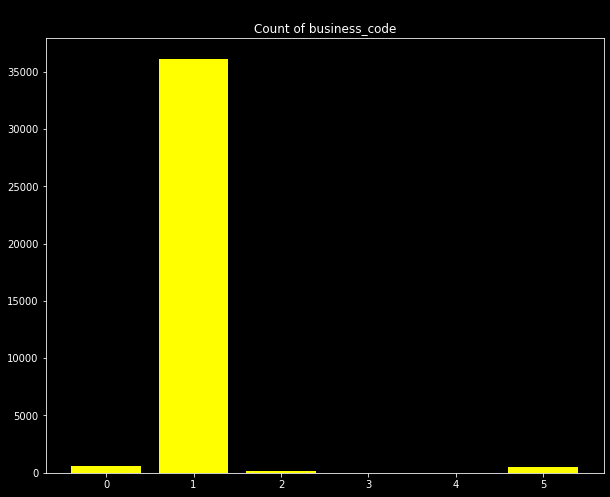

<Figure size 1440x1440 with 0 Axes>

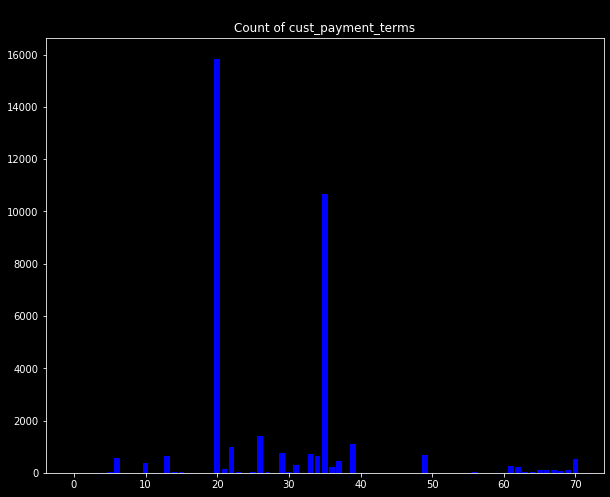

<Figure size 1440x1440 with 0 Axes>

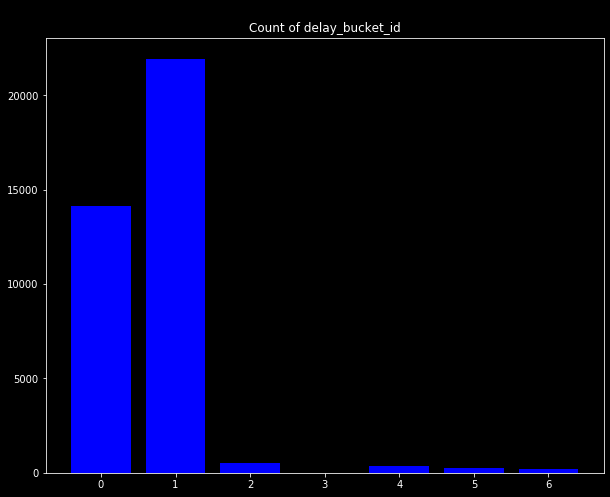

<Figure size 1440x1440 with 0 Axes>

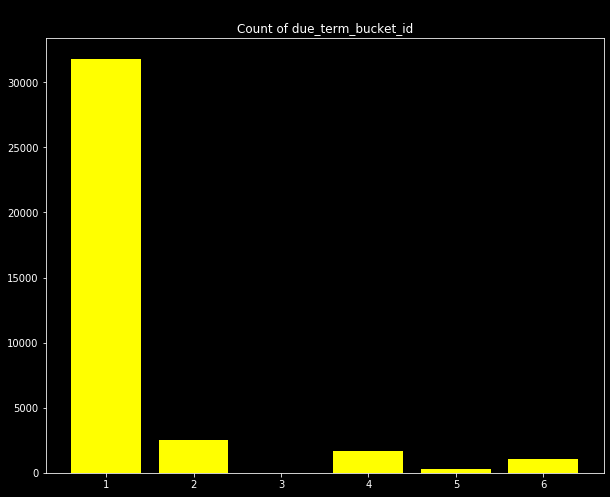

<Figure size 1440x1440 with 0 Axes>

In [2519]:
features = ['business_code','cust_payment_terms', 'delay_bucket_id','due_term_bucket_id']

for col in features:
    plt.style.use('dark_background')
    fig,ax = plt.subplots(figsize=(10,8))
    plt.bar(list(Data[col].value_counts().index),list(Data[col].value_counts()),color = random.sample(['Blue','yellow'],1))            
    plt.title('\nCount of {}'.format(col))
    plt.figure(figsize=(20,20))
    plt.show()

Box PLot

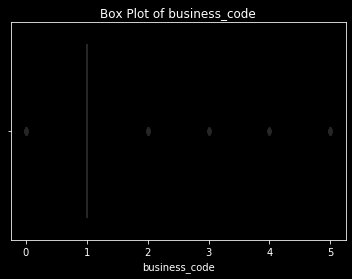

<Figure size 1440x1440 with 0 Axes>

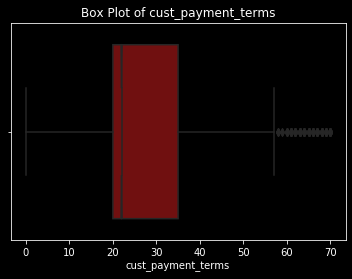

<Figure size 1440x1440 with 0 Axes>

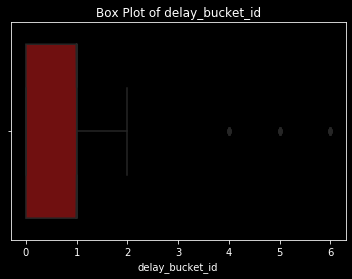

<Figure size 1440x1440 with 0 Axes>

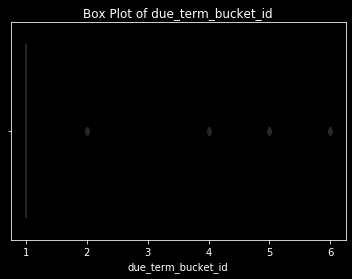

<Figure size 1440x1440 with 0 Axes>

In [2520]:
#Plotting of box plot
features = ['business_code','cust_payment_terms', 'delay_bucket_id','due_term_bucket_id']

for col in features:
    plt.style.use('dark_background')
    seaborn.boxplot(Data[col],color='maroon',notch=True)
    plt.title('Box Plot of {}'.format(col))
    plt.figure(figsize=(20,20))
    plt.show()

Scatter Plot

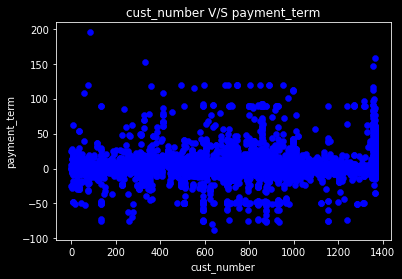

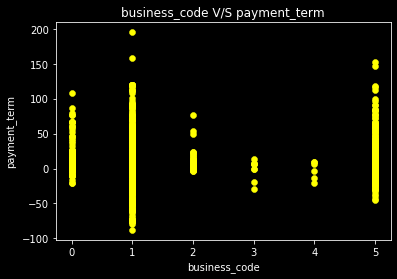

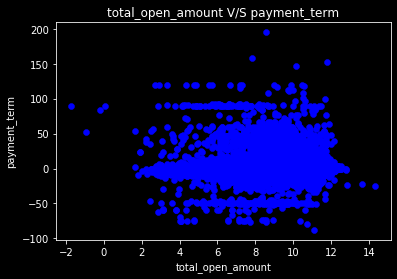

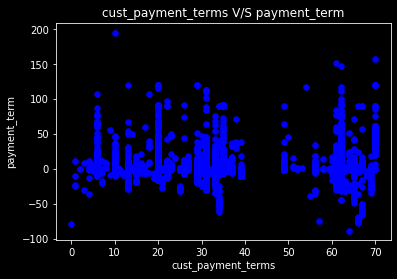

In [2521]:
#plotting of Scater plot
x_val = ['cust_number','business_code', 'total_open_amount', 'cust_payment_terms']
y_val = 'payment_term'
for col in x_val:
    plt.scatter(Data[col],Data['delay'],color=random.sample(['yellow','blue'],1),linewidth = .5)
    plt.title('{} V/S {}'.format(col,y_val))
    plt.xlabel(col)
    plt.ylabel(y_val)
    plt.show()

In [2522]:
Data_copy = Data.copy()
Test_Data_copy = Test_Data.copy()

In [2523]:
Data.describe()

,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,payment_term,due_term,delay,delay_bucket_id,due_term_bucket_id,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
count,37407.000000,37407.000000,37407.000000,37407.000000,37407.000000,37407.000000,37407.000000,37407.000000,37407.000000,37407.000000,...,37407.000000,37407.000000,37407.000000,3.740700e+04,37407.000000,37407.000000,3.740700e+04,37407.000000,37407.000000,37407.000000
mean,1.045954,811.159462,0.132569,9.335776,28.230893,18.409950,17.795225,0.614725,0.719037,1.379902,...,30281.950765,17.795225,1.000000,-1.091891e-15,0.021825,0.017463,1.359057e-04,2487.071858,0.124236,31.901600
std,0.499907,236.785058,0.339113,1.800725,11.592555,13.401026,10.803054,10.680808,0.797443,1.086784,...,21361.217807,6.718018,1.215778,1.215778e+00,0.890653,0.538714,4.535958e-03,3739.332676,0.175668,276.902769
min,0.000000,0.000000,0.000000,-1.714798,0.000000,0.000000,0.000000,-88.000000,0.000000,1.000000,...,28.860000,0.000000,0.000011,-9.999886e-01,0.000000,0.000000,0.000000e+00,1.000000,0.000003,0.000000
25%,1.000000,719.000000,0.000000,8.362129,20.000000,13.000000,15.000000,-3.000000,0.000000,1.000000,...,22078.707284,15.021511,0.229537,-7.704632e-01,0.000331,0.000361,7.481328e-08,81.000000,0.002534,0.048917
50%,1.000000,856.000000,0.000000,9.720806,22.000000,15.000000,15.000000,0.000000,1.000000,1.000000,...,22149.664473,16.446029,0.718918,-2.810824e-01,0.000917,0.000987,1.778799e-06,356.000000,0.022784,0.479798
75%,1.000000,876.000000,0.000000,10.711292,35.000000,17.000000,15.000000,2.000000,1.000000,1.000000,...,43884.034286,18.436364,1.436197,4.361969e-01,0.004001,0.003985,9.155459e-06,1521.000000,0.361823,5.352106
max,5.000000,1368.000000,1.000000,14.330402,70.000000,205.000000,121.000000,195.000000,6.000000,6.000000,...,955668.020000,120.000000,40.157760,3.915776e+01,166.666667,99.050633,5.740528e-01,9065.000000,0.409261,26333.333333


In [2524]:
pay_max = 80
Data[Data['payment_term']>=pay_max]['payment_term'].value_counts().sum()

354

In [2525]:
Data = Data[(Data['total_open_amount'] > 1) & (Data['payment_term']<=pay_max )].reset_index(drop=True)

In [2526]:
Data

,business_code,cust_number,clear_date,buisness_year,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,payment_term,due_term,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
0,1,820,2019-02-04,0,2018-12-31,4.902605,2018-12-16,38,50,15,...,22428.750000,15.000000,0.006003,-0.993997,0.111408,0.111408,4.777032e-05,14,0.000624,1.559715
1,0,382,2019-02-20,0,2019-01-06,9.556990,2018-12-27,6,55,10,...,33635.631786,10.000000,0.673743,-0.326257,0.000441,0.000441,1.061799e-05,28,0.000832,0.012356
2,1,856,2019-01-10,0,2019-01-14,10.232365,2018-12-30,35,11,15,...,22149.664473,15.021511,1.254563,0.254563,0.000540,0.000541,7.481328e-08,9065,0.409261,4.893271
3,1,856,2019-01-09,0,2019-01-14,9.440134,2018-12-30,35,10,15,...,22149.664473,15.021511,0.568108,-0.431892,0.001192,0.001194,7.481328e-08,9065,0.409261,10.805903
4,1,856,2019-01-09,0,2019-01-14,7.904907,2018-12-30,35,10,15,...,22149.664473,15.021511,0.122374,-0.877626,0.005534,0.005542,7.481328e-08,9065,0.409261,50.165096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37050,1,477,2020-03-12,1,2020-03-12,6.568836,2020-02-26,20,15,15,...,5682.368000,15.714286,0.125395,-0.874605,0.021051,0.022054,3.950638e-05,70,0.012319,1.473601
37051,1,1365,2020-03-27,1,2020-04-01,9.555743,2020-02-26,33,30,35,...,23651.672679,35.000000,0.597234,-0.402766,0.002478,0.002478,3.303149e-06,448,0.018942,1.110042
37052,1,591,2020-03-20,1,2020-03-13,10.251029,2020-02-27,20,22,15,...,21818.677500,33.750000,1.297588,0.297588,0.000530,0.001192,3.867100e-04,4,0.000183,0.002119
37053,1,833,2020-03-13,1,2020-03-13,11.231609,2020-02-27,35,15,15,...,34907.794561,19.171540,2.162237,1.162237,0.000199,0.000254,5.352877e-07,1026,0.029392,0.203898


In [2527]:
# Distributing the data into categorical and numerical features

In [2528]:
categorical_features = ['business_code', 'cust_payment_terms','due_term_bucket_id']

In [2529]:
numerical_features = list(set(set(Data.columns) - set(['DELAY BUCKET(DAYS)', 'DUE TERM BUCKET(DAYS)', 'delay_bucket_id', 'due_term_bucket_id','clear_date', 'due_in_date', 'baseline_create_date'])) - set(categorical_features))

## Scaling the Numerical Features

In [2530]:
info_d=Data[['clear_date', 'due_in_date', 'baseline_create_date','total_open_amount']]

In [2531]:
Train_numerical = Data[list(set(numerical_features)   -  set(['payment_term','delay']))]
Test_numerical = Test_Data[list(set(numerical_features)   -  set(['payment_term','delay']))]
Train_categorical= Data[categorical_features]
Test_categorical = Test_Data[list(set(categorical_features))]

In [2532]:
#Applying Scaling using min-max scalar
scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
Final_Train_df = pd.DataFrame(scaler.fit_transform(Train_numerical[list(set(numerical_features)-set(['payment_term','delay']))]),columns=list(set(numerical_features)-set(['payment_term','delay'])))
Final_Test_df = pd.DataFrame(scaler.fit_transform(Test_numerical ),columns=list(set(numerical_features)-set(['payment_term','delay'])))
Data['delay'] = y_scaler.fit_transform(np.array(Data['delay']).reshape(Data['delay'].shape[0],1))

In [2533]:
Final_Train_df

,mean_due_term,due_term,amount/mean_amount,due_in_date.month,Sum_due_term,cust_count*due_term/amount,mean_base_amount,baseline_create_date.month,amount-/mean_amount,due_term/amount,...,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_number,cust_count,baseline_create_date.day,Sum_base_amount,due_in_date.day,total_open_amount,due_in_date.year,cust_count/mean_amount
0,0.166667,0.123967,0.000146,1.000000,0.001542,8.614420e-05,0.023440,1.000000,0.000146,0.019951,...,0.021263,8.321590e-05,0.599122,0.001434,0.500000,0.001564,1.000000,0.257836,0.0,0.001518
1,0.111111,0.082645,0.016774,0.000000,0.002056,6.824098e-07,0.035167,1.000000,0.016774,0.000079,...,0.000084,1.849654e-05,0.278713,0.002979,0.866667,0.004690,0.166667,0.624233,0.5,0.002026
2,0.166906,0.123967,0.031238,0.000000,1.000000,2.702590e-04,0.023148,1.000000,0.031238,0.000097,...,0.000103,1.303247e-07,0.625457,1.000000,0.966667,1.000000,0.433333,0.677399,0.5,1.000000
3,0.166906,0.123967,0.014144,0.000000,1.000000,5.968180e-04,0.023148,1.000000,0.014144,0.000213,...,0.000228,1.303247e-07,0.625457,1.000000,0.966667,1.000000,0.433333,0.615034,0.5,1.000000
4,0.166906,0.123967,0.003044,0.000000,1.000000,2.770655e-03,0.023148,1.000000,0.003044,0.000991,...,0.001058,1.303247e-07,0.625457,1.000000,0.966667,1.000000,0.433333,0.494180,0.5,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37050,0.174603,0.123967,0.003119,0.181818,0.008078,8.138810e-05,0.005916,0.090909,0.003119,0.003770,...,0.004209,6.882012e-05,0.348208,0.007613,0.833333,0.001981,0.366667,0.389003,1.0,0.030093
37051,0.388889,0.289256,0.014869,0.272727,0.115150,6.130845e-05,0.024719,0.090909,0.014869,0.000444,...,0.000473,5.754086e-06,0.997805,0.049316,0.833333,0.052772,0.000000,0.624135,1.0,0.046275
37052,0.375000,0.123967,0.032309,0.181818,0.000991,1.170488e-07,0.022801,0.090909,0.032309,0.000095,...,0.000228,6.736488e-04,0.431602,0.000331,0.866667,0.000435,0.400000,0.678869,1.0,0.000440
37053,0.213017,0.123967,0.053841,0.181818,0.144452,1.126144e-05,0.036498,0.090909,0.053841,0.000036,...,0.000048,9.324711e-07,0.608632,0.113085,0.866667,0.178375,0.400000,0.756061,1.0,0.071809


In [2534]:
Final_Test_df

,mean_due_term,due_term,amount/mean_amount,due_in_date.month,Sum_due_term,cust_count*due_term/amount,mean_base_amount,baseline_create_date.month,amount-/mean_amount,due_term/amount,...,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_number,cust_count,baseline_create_date.day,Sum_base_amount,due_in_date.day,total_open_amount,due_in_date.year,cust_count/mean_amount
0,0.166667,0.166667,0.000131,0.000000,0.002348,NaN,0.023910,0.00,0.000131,0.009173,...,0.007093,0.000780,0.575403,NaN,0.500000,0.001958,1.000000,0.338713,0.0,0.008468
1,0.268391,0.355556,0.002934,0.333333,0.073112,0.001648,0.025503,0.25,0.002934,0.000824,...,0.000481,0.000061,0.468521,0.002463,0.866667,0.040414,0.966667,0.567402,0.0,0.006469
2,0.167982,0.166667,0.035528,0.333333,1.000000,NaN,0.028909,0.25,0.035528,0.000028,...,0.000022,0.000002,0.610542,NaN,0.866667,1.000000,0.400000,0.756399,0.0,0.007446
3,0.166667,0.166667,0.020887,0.333333,0.012916,0.000030,0.045961,0.25,0.020887,0.000030,...,0.000023,0.000074,0.680820,0.000000,0.866667,0.020623,0.400000,0.751280,0.0,0.005240
4,0.388889,0.388889,0.011707,0.500000,0.015525,0.000656,0.035249,0.25,0.011707,0.000164,...,0.000127,0.000437,0.998536,0.007389,0.866667,0.008160,0.033333,0.690450,0.0,0.010003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.111111,0.111111,0.038332,0.666667,0.004175,0.000004,0.142894,1.00,0.038332,0.000004,...,0.000003,0.000033,0.213763,0.000000,0.500000,0.030969,0.833333,0.842692,0.0,0.000531
9996,0.111111,0.111111,0.038332,0.666667,0.004175,0.000004,0.142894,1.00,0.038332,0.000004,...,0.000003,0.000033,0.213763,0.000000,0.500000,0.030969,0.833333,0.842692,0.0,0.000531
9997,0.190476,0.166667,0.019437,0.833333,0.125245,NaN,0.047397,1.00,0.019437,0.000032,...,0.000028,0.000010,0.587116,NaN,0.533333,0.180453,0.000000,0.748297,0.0,0.004383
9998,0.111111,0.111111,0.030254,0.666667,0.000261,0.000169,0.018804,1.00,0.030254,0.000034,...,0.000026,0.003957,0.222548,0.009852,0.600000,0.000254,0.933333,0.680061,0.0,0.004152


In [2535]:
numerical_cols = Final_Train_df.columns

In [2536]:
Final_Train_df=pd.merge(Final_Train_df,Data['cust_number'],left_index=True,right_index=True)
Final_Test_df=pd.merge(Final_Test_df,Test_Data['cust_number'],left_index=True,right_index=True)

In [2537]:
Final_Test_df=pd.merge(Final_Test_df,info_d.drop(columns = ['clear_date']),left_index=True,right_index=True)

In [2538]:
Final_Train_df=pd.merge(Final_Train_df,info_d,left_index=True,right_index=True)

In [2539]:
Final_Train_df.shape

(37055, 27)

In [2540]:
Final_Test_df.shape

(10000, 26)

# One Hot Encoding on the categorical data

In [2541]:
Data_categorical=pd.concat((Train_categorical,Test_categorical),sort=False).reset_index(drop=True)
Data_categorical

,business_code,cust_payment_terms,due_term_bucket_id
0,1,38,1
1,0,6,1
2,1,35,1
3,1,35,1
4,1,35,1
...,...,...,...
47050,0,1,1
47051,0,1,1
47052,1,28,1
47053,0,1,1


In [2542]:
#Applying dummies varible concept for encoding
Data_categorical1 = pd.get_dummies(Data_categorical,prefix='enc_c_',columns = ['business_code'],drop_first=False)
Data_categorical2 = pd.get_dummies(Data_categorical,prefix='enc_c___',columns = ['cust_payment_terms'],drop_first=False)
Data_categorical1 = pd.merge(Data_categorical1,Data_categorical2,left_index=True,right_index=True)
Data_categorical2 = pd.get_dummies(Data_categorical,prefix='enc_c',columns = ['due_term_bucket_id'],drop_first=False)
Data_categorical1 = pd.merge(Data_categorical1,Data_categorical2,left_index=True,right_index=True)
#categoricl=merge
Data_categorical1 = Data_categorical1.drop(columns =['cust_payment_terms_x', 'due_term_bucket_id_x','due_term_bucket_id_y','business_code_y','cust_payment_terms_y','business_code_x']) 

In [2543]:
Data_categorical1.columns

Index(['enc_c__0', 'enc_c__1', 'enc_c__2', 'enc_c__3', 'enc_c__4', 'enc_c__5',
       'enc_c____0', 'enc_c____1', 'enc_c____2', 'enc_c____3', 'enc_c____4',
       'enc_c____5', 'enc_c____6', 'enc_c____7', 'enc_c____8', 'enc_c____9',
       'enc_c____10', 'enc_c____11', 'enc_c____12', 'enc_c____13',
       'enc_c____14', 'enc_c____15', 'enc_c____16', 'enc_c____17',
       'enc_c____18', 'enc_c____19', 'enc_c____20', 'enc_c____21',
       'enc_c____22', 'enc_c____23', 'enc_c____24', 'enc_c____25',
       'enc_c____26', 'enc_c____27', 'enc_c____28', 'enc_c____29',
       'enc_c____30', 'enc_c____31', 'enc_c____32', 'enc_c____33',
       'enc_c____34', 'enc_c____35', 'enc_c____36', 'enc_c____37',
       'enc_c____38', 'enc_c____39', 'enc_c____40', 'enc_c____41',
       'enc_c____42', 'enc_c____49', 'enc_c____50', 'enc_c____52',
       'enc_c____53', 'enc_c____55', 'enc_c____56', 'enc_c____57',
       'enc_c____58', 'enc_c____59', 'enc_c____60', 'enc_c____61',
       'enc_c____62', 'enc_c__

In [2544]:
final_train_1 = Data_categorical1[:Data.shape[0]].reset_index(drop=True)
final_test_1 = Data_categorical1[Data.shape[0]:].reset_index(drop=True)

In [2545]:
final_train_1.shape

(37055, 73)

In [2546]:
final_test_1.shape

(10000, 73)

In [2547]:
#Merging the Numerical, Categorical and Numerical-Categorical Data

In [2548]:
Testing_Data = Final_Test_df.merge(final_test_1.reset_index(drop=True),left_index=True,right_index=True)

In [2549]:
Testing_Data

,mean_due_term,due_term,amount/mean_amount,due_in_date.month,Sum_due_term,cust_count*due_term/amount,mean_base_amount,baseline_create_date.month,amount-/mean_amount,due_term/amount,...,enc_c____66,enc_c____67,enc_c____68,enc_c____69,enc_c____70,enc_c_1,enc_c_2,enc_c_4,enc_c_5,enc_c_6
0,0.166667,0.166667,0.000131,0.000000,0.002348,NaN,0.023910,0.00,0.000131,0.009173,...,0,0,0,0,0,1,0,0,0,0
1,0.268391,0.355556,0.002934,0.333333,0.073112,0.001648,0.025503,0.25,0.002934,0.000824,...,0,0,0,0,0,0,0,1,0,0
2,0.167982,0.166667,0.035528,0.333333,1.000000,NaN,0.028909,0.25,0.035528,0.000028,...,0,0,0,0,0,1,0,0,0,0
3,0.166667,0.166667,0.020887,0.333333,0.012916,0.000030,0.045961,0.25,0.020887,0.000030,...,0,0,0,0,0,1,0,0,0,0
4,0.388889,0.388889,0.011707,0.500000,0.015525,0.000656,0.035249,0.25,0.011707,0.000164,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.111111,0.111111,0.038332,0.666667,0.004175,0.000004,0.142894,1.00,0.038332,0.000004,...,0,0,0,0,0,1,0,0,0,0
9996,0.111111,0.111111,0.038332,0.666667,0.004175,0.000004,0.142894,1.00,0.038332,0.000004,...,0,0,0,0,0,1,0,0,0,0
9997,0.190476,0.166667,0.019437,0.833333,0.125245,NaN,0.047397,1.00,0.019437,0.000032,...,0,0,0,0,0,1,0,0,0,0
9998,0.111111,0.111111,0.030254,0.666667,0.000261,0.000169,0.018804,1.00,0.030254,0.000034,...,0,0,0,0,0,1,0,0,0,0


In [2550]:
#merging of dataframe
Training_Data = Final_Train_df.merge(final_train_1.reset_index(drop=True),left_index=True,right_index=True)
Training_Data = Training_Data.merge(Data['delay'].reset_index(drop=True),left_index=True,right_index=True)
Training_Data

,mean_due_term,due_term,amount/mean_amount,due_in_date.month,Sum_due_term,cust_count*due_term/amount,mean_base_amount,baseline_create_date.month,amount-/mean_amount,due_term/amount,...,enc_c____67,enc_c____68,enc_c____69,enc_c____70,enc_c_1,enc_c_2,enc_c_4,enc_c_5,enc_c_6,delay
0,0.166667,0.123967,0.000146,1.000000,0.001542,8.614420e-05,0.023440,1.000000,0.000146,0.019951,...,0,0,0,0,1,0,0,0,0,0.750000
1,0.111111,0.082645,0.016774,0.000000,0.002056,6.824098e-07,0.035167,1.000000,0.016774,0.000079,...,0,0,0,0,1,0,0,0,0,0.810976
2,0.166906,0.123967,0.031238,0.000000,1.000000,2.702590e-04,0.023148,1.000000,0.031238,0.000097,...,0,0,0,0,1,0,0,0,0,0.512195
3,0.166906,0.123967,0.014144,0.000000,1.000000,5.968180e-04,0.023148,1.000000,0.014144,0.000213,...,0,0,0,0,1,0,0,0,0,0.506098
4,0.166906,0.123967,0.003044,0.000000,1.000000,2.770655e-03,0.023148,1.000000,0.003044,0.000991,...,0,0,0,0,1,0,0,0,0,0.506098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37050,0.174603,0.123967,0.003119,0.181818,0.008078,8.138810e-05,0.005916,0.090909,0.003119,0.003770,...,0,0,0,0,1,0,0,0,0,0.536585
37051,0.388889,0.289256,0.014869,0.272727,0.115150,6.130845e-05,0.024719,0.090909,0.014869,0.000444,...,0,0,0,0,0,0,1,0,0,0.506098
37052,0.375000,0.123967,0.032309,0.181818,0.000991,1.170488e-07,0.022801,0.090909,0.032309,0.000095,...,0,0,0,0,1,0,0,0,0,0.579268
37053,0.213017,0.123967,0.053841,0.181818,0.144452,1.126144e-05,0.036498,0.090909,0.053841,0.000036,...,0,0,0,0,1,0,0,0,0,0.536585


In [2551]:
set(Training_Data.columns) - set(Testing_Data.columns)

{'clear_date', 'delay'}

## Generating The Test-Train Evaluation Data

In [2552]:
x_Data1 = Training_Data[set(Training_Data.columns) - set(['delay'])]
x_Data1.shape

(37055, 100)

In [2553]:
x_Test1 = Testing_Data[set(Testing_Data.columns) - set(['delay'])]
x_Test1.shape

(10000, 99)

In [2554]:
y1_Data = Training_Data['delay']
y1_Data.shape

(37055,)

In [2555]:
eval_range = (math.ceil(Data.shape[0]*(0.25)))+1#Applying constraint
x1_Train,x_eval,y1_Train,y_eval = x_Data1[eval_range:].reset_index(drop=True),x_Data1[0:eval_range].reset_index(drop=True),y1_Data[eval_range:].reset_index(drop=True),y1_Data[0:eval_range].reset_index(drop=True) 

In [2556]:
#Applying constraint
eval_range = (math.ceil(x_eval.shape[0]*(0.4)))+1
x_eval1,x_eval2,y_eval1,y_eval2 = x_eval[eval_range:].reset_index(drop=True),x_eval[0:eval_range].reset_index(drop=True),y_eval[eval_range:].reset_index(drop=True),y_eval[0:eval_range].reset_index(drop=True)

In [2557]:
x_train_info = x1_Train[['clear_date','total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]
x_eval1_info = x_eval1[['clear_date','total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]
x_eval2_info = x_eval2[['clear_date','total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]
x_test_info = x_Test1[['total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]

x1_Train = x1_Train.drop(columns=['clear_date','baseline_create_date','due_in_date'])
x_eval1 = x_eval1.drop(columns=['clear_date','baseline_create_date','due_in_date'])
x_eval2 = x_eval2.drop(columns=['clear_date','baseline_create_date','due_in_date'])
x_Test1 = x_Test1.drop(columns=['baseline_create_date','due_in_date'])
x_Test1.shape

(10000, 97)

In [2558]:
x1_Train.shape,y1_Train.shape

((27790, 97), (27790,))

In [2559]:
x_eval1.shape,y_eval1.shape

((5558, 97), (5558,))

In [2560]:
x_eval2.shape,y_eval2.shape

((3707, 97), (3707,))

In [2561]:
x_Test1.shape

(10000, 97)

In [2562]:
#To write the final created dataset to the working directory
x1_Train.to_csv('x_train.csv')
x_Test1.to_csv('x_test.csv')
y1_Train.to_csv('y_train.csv')

x_eval1.to_csv('x_eval1.csv')
x_eval2.to_csv('x_eval2.csv')
y_eval1.to_csv('y_eval1.csv')
y_eval2.to_csv('y_eval2.csv')

# Feature Selection

In [2563]:
#Selecting of features feasible of modelling
def select_features(x1_Train,y1_Train,x_Test1,x_eval1,x_eval2):
    fs = SelectKBest(score_func = f_regression,k=10)
    fs.fit(x1_Train,y1_Train)
    col_indices = fs.get_support(indices=True)
    x_features = x_train.columns[col_indices]
    x_train_fs = pd.DataFrame(fs.transform(x_train),columns=x_features)
    x_test_fs = pd.DataFrame(fs.transform(x_test),columns=x_features)
    x_eval1_fs = pd.DataFrame(fs.transform(x_eval1),columns=x_features)
    x_eval2_fs = pd.DataFrame(fs.transform(x_eval2),columns=x_features)
    return x_train_fs,x_test_fs,x_eval1_fs,x_eval2_fs,fs,x_features,col_indices
x_Test1.shape

(10000, 97)

# Model Training, Prediction and Evaluation

In [2564]:
#Prediction of diffrent accuracy and error in model
def evaluate_metrics(x,y_true,y_pred,mod):
    mean_abs_error = mean_absolute_error(y_true,y_pred)
    mean_sq_error = mean_squared_error(y_true,y_pred)
    root_mean_sq_error = mean_squared_error(y_true,y_pred)**0.5
    r2_scr = r2_score(y_true,y_pred)
    median_abs_score = median_absolute_error(y_true,y_pred)
    explained_variance = explained_variance_score(y_true,y_pred)
    return mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance  
x_Test1

,enc_c____42,enc_c____31,enc_c____55,enc_c____34,enc_c____50,enc_c____8,enc_c____33,enc_c__4,Sum_due_term,enc_c____49,...,enc_c____15,enc_c____56,baseline_create_date.year,enc_c____58,buisness_year,enc_c____0,enc_c____4,enc_c____26,enc_c____1,enc_c____21
0,0,1,0,0,0,0,0,0,0.002348,0,...,0,0,0.0,0,0.0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0.073112,0,...,0,0,0.0,0,0.0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1.000000,0,...,0,0,0.0,0,0.0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0.012916,0,...,0,0,0.0,0,0.0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0.015525,0,...,0,0,0.0,0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0.004175,0,...,0,0,0.0,0,0.0,0,0,0,1,0
9996,0,0,0,0,0,0,0,0,0.004175,0,...,0,0,0.0,0,0.0,0,0,0,1,0
9997,0,0,0,0,0,0,0,0,0.125245,0,...,0,0,0.0,0,0.0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0.000261,0,...,0,0,0.0,0,0.0,0,0,0,1,0


In [2565]:
Data.corr()['payment_term']

business_code                    0.226840
cust_number                      0.111895
buisness_year                   -0.008238
total_open_amount               -0.030589
cust_payment_terms               0.258183
payment_term                     1.000000
due_term                         0.624555
delay                            0.508195
delay_bucket_id                  0.527981
due_term_bucket_id               0.690458
baseline_create_date.day         0.010081
baseline_create_date.year       -0.009049
baseline_create_date.month      -0.045636
due_in_date.day                 -0.018110
due_in_date.year                -0.015819
due_in_date.month                0.021056
Sum_base_amount                 -0.283004
Sum_due_term                    -0.284892
mean_base_amount                 0.038947
mean_due_term                    0.398268
amount/mean_amount              -0.050377
amount-/mean_amount             -0.050377
due_term/amount                  0.062793
mean_due_term/amount             0

## Linear Regression

In [2566]:
model1 = LinearRegression()
parameters = {'fit_intercept':[True,False],'n_jobs':[1,2,3],'normalize':[True,False]}
grid = GridSearchCV(estimator = model1,param_grid= parameters,scoring = 'neg_mean_squared_error',verbose = 1)     
grid_results = grid.fit(x1_Train,y1_Train)
print('BEST SCORE:  ',grid_results.best_score_)
print('BEST PARAMS:  ',grid_results.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


BEST SCORE:   -0.005246869000843365
BEST PARAMS:   {'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    2.8s finished


In [2567]:
rego_metrics = []
model1 = LinearRegression(fit_intercept = grid_results.best_params_['fit_intercept'],n_jobs = grid_results.best_params_['n_jobs'])
model1.fit(x1_Train,y1_Train)# model fitting
y_pred1 = model1.predict(x_eval1)
y_pred1 = y_pred1.reshape(y_pred1.shape[0])
y_eval1 = np.array(y_eval1)
y_predicted = y_scaler.inverse_transform(y_pred1.reshape(y_pred1.shape[0],1)).reshape(y_pred1.shape[0])
y_true = y_scaler.inverse_transform(y_eval1.reshape(y_eval1.shape[0],1)).reshape(y_eval1.shape[0])
mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1,y_pred1,model1)
scr = model1.score(x_eval1,y_eval1)
rego_metrics.append([mean_abs_error,scr,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])
#predicting the accuracy
print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)

METRICS  :

Mean Absolute Error :   0.022817170684385824 
Score :    0.4249771312320459 
Mean Squared Error :   0.001977537577438686 
Root Mean Squared Error :   0.04446951289859926 
R2 Square :   0.42497713123204595 
Median Absolute Score :   0.00965802056022752 
Explained Variance Score :   0.429547323971605


In [2568]:
rego_metrics

[[0.022817170684385824,
  0.4249771312320459,
  0.001977537577438686,
  0.04446951289859926,
  0.42497713123204595,
  0.00965802056022752,
  0.429547323971605]]

## Random Forest Regressor

In [2569]:
#Applying Randaom Forest Regressor
rfr = RandomForestRegressor(max_depth=10,n_estimators=500,random_state=False,verbose=True) 
#model.fit()
rfr.fit(x1_Train,y1_Train)

y_pred1 = rfr.predict(x_eval1)

scr = rfr.score(x_eval1,y_eval1)

mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1,y_pred1,rfr)
rego_metrics.append([mean_abs_error,scr,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])
#predicting the accuracy
print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


METRICS  :

Mean Absolute Error :   0.01857157651942897 
Score :    0.5905984921320903 
Mean Squared Error :   0.0014079559440888286 
Root Mean Squared Error :   0.03752273902700639 
R2 Square :   0.5905984921320903 
Median Absolute Score :   0.008226925050618561 
Explained Variance Score :   0.5916025082243455


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [2570]:
# Calculating Accuracy
y_pred2 = rfr.predict(x_eval2)

scr = rfr.score(x_eval2,y_eval2)
#predicting the accuracy
mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval2,np.array(y_eval2).reshape(np.array(y_eval2).shape[0],1),y_pred2,rfr)
print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


METRICS  :

Mean Absolute Error :   0.01772452325780987 
Score :    0.5438645444398488 
Mean Squared Error :   0.0012793545287283848 
Root Mean Squared Error :   0.035768065767222926 
R2 Square :   0.5438645444398488 
Median Absolute Score :   0.008524980870926901 
Explained Variance Score :   0.5461686310510383


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


## Decision Tree Regressor

In [2571]:
#Applying Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(x1_Train,y1_Train)#model fitting
y_pred1 = dt.predict(x_eval1)
mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1,y_pred1,dt)
scr = dt.score(x_eval1,y_eval1)
rego_metrics.append([mean_abs_error,scr,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])
#predicting the accuracy
print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)

METRICS  :

Mean Absolute Error :   0.02359614208772531 
Score :    0.1317963816117802 
Mean Squared Error :   0.0029858034757984297 
Root Mean Squared Error :   0.05464250612662664 
R2 Square :   0.1317963816117802 
Median Absolute Score :   0.012195121951219523 
Explained Variance Score :   0.13365929870794302


In [2572]:
x_test_info

,total_open_amount_y,cust_number_y,baseline_create_date,due_in_date
0,4.902605,393,2018-12-16,2018-12-31
1,9.556990,320,2018-12-27,2019-01-06
2,10.232365,417,2018-12-30,2019-01-14
3,9.440134,465,2018-12-30,2019-01-14
4,7.904907,682,2018-12-30,2019-01-14
...,...,...,...,...
9995,9.682055,146,2019-04-18,2019-05-03
9996,6.156046,146,2019-04-18,2019-05-03
9997,9.935380,401,2019-04-18,2019-05-03
9998,10.994244,152,2019-04-18,2019-05-03


In [2573]:
output1 = pd.DataFrame(columns=['INVOICE CREATE DATE','AMOUNT(IN USD)','INVOICE DUE DATE','INVOICE PAYMENT TERM','INVOICE PAYMENT DATE','DELAY'])

In [2574]:
output1['INVOICE CREATE DATE'] = x_test_info['baseline_create_date']
output1['INVOICE DUE DATE'] = x_test_info['due_in_date']
output1['AMOUNT(IN USD)'] = x_test_info['total_open_amount_y'].apply(np.exp)
x_Test1.shape


(10000, 97)

In [2575]:
x_Test1.replace([np.inf,-np.inf],np.nan,inplace=True)
#x_Test1 = SimpleImputer(missing_values=np.nan, strategy='mean')
#x_Test1.fillna(0,inplace=True)

In [2576]:
x_Test1.replace([np.inf,-np.inf],np.nan,inplace=True)
#x_Test1 = SimpleImputer(missing_values=np.nan, strategy='mean')
x_Test1.fillna(0,inplace=True)
from sklearn.impute import SimpleImputer
IMP1=SimpleImputer(missing_values=np.nan, strategy='mean')
IMP1.fit_transform(x_Test1)
#x_Test1.replace([np.inf,-np.inf],np.nan,inplace=True)
#x_Test1 = SimpleImputer(missing_values=np.nan, strategy='mean')
#x_Test1.fillna(0,inplace=True)

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [2577]:
#x_Test1 = x_Test1.dropna()
y_pred = rfr.predict(x_Test1)
#y_pred  = pd.DataFrame(y_pred)
y_pred = y_scaler.inverse_transform(np.array(y_pred).reshape(np.array(y_pred).shape[0],1)).reshape(np.array(y_pred).shape[0])
y_pred = np.ceil(np.array(y_pred))
y_pred  = pd.DataFrame(y_pred)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


,0
0,2.0
1,-2.0
2,1.0
3,1.0
4,3.0
...,...
9995,3.0
9996,4.0
9997,1.0
9998,7.0


In [2578]:
output1['INVOICE PAYMENT TERM'] = y_pred
#pd.merge(df,y_pred,how = 'left',left_index = True, right_index = True)
# pd.merge(df,y_pred,how = 'left',left_index = True, right_index = True)
output1['INVOICE PAYMENT DATE'] = output1['INVOICE CREATE DATE'] + pd.to_timedelta(np.ceil(output1['INVOICE PAYMENT TERM']),'D')
output1

,INVOICE CREATE DATE,AMOUNT(IN USD),INVOICE DUE DATE,INVOICE PAYMENT TERM,INVOICE PAYMENT DATE,DELAY
0,2018-12-16,134.640000,2018-12-31,2.0,2018-12-18,NaN
1,2018-12-27,14143.204416,2019-01-06,-2.0,2018-12-25,NaN
2,2018-12-30,27788.160000,2019-01-14,1.0,2018-12-31,NaN
3,2018-12-30,12583.400000,2019-01-14,1.0,2018-12-31,NaN
4,2018-12-30,2710.550000,2019-01-14,3.0,2019-01-02,NaN
...,...,...,...,...,...,...
9995,2019-04-18,16027.400000,2019-05-03,3.0,2019-04-21,NaN
9996,2019-04-18,471.560000,2019-05-03,4.0,2019-04-22,NaN
9997,2019-04-18,20648.130000,2019-05-03,1.0,2019-04-19,NaN
9998,2019-04-18,59530.510000,2019-05-03,7.0,2019-04-25,NaN


In [2579]:
#Predicting the Delay days of payment
output1['DELAY'] = pd.Series(output1['INVOICE DUE DATE'] - output1['INVOICE PAYMENT DATE']).dt.days
output1

,INVOICE CREATE DATE,AMOUNT(IN USD),INVOICE DUE DATE,INVOICE PAYMENT TERM,INVOICE PAYMENT DATE,DELAY
0,2018-12-16,134.640000,2018-12-31,2.0,2018-12-18,13
1,2018-12-27,14143.204416,2019-01-06,-2.0,2018-12-25,12
2,2018-12-30,27788.160000,2019-01-14,1.0,2018-12-31,14
3,2018-12-30,12583.400000,2019-01-14,1.0,2018-12-31,14
4,2018-12-30,2710.550000,2019-01-14,3.0,2019-01-02,12
...,...,...,...,...,...,...
9995,2019-04-18,16027.400000,2019-05-03,3.0,2019-04-21,12
9996,2019-04-18,471.560000,2019-05-03,4.0,2019-04-22,11
9997,2019-04-18,20648.130000,2019-05-03,1.0,2019-04-19,14
9998,2019-04-18,59530.510000,2019-05-03,7.0,2019-04-25,8


# Final Prediction!!!